                                                             Bike path usage in 2013                                                             


,Rachel / Papineau,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,Totem_Laurier,Notre-Dame,Rachel / Hôtel de Ville,Saint-Antoine,René-Lévesque,Viger,Boyer,Maisonneuve_3,University
Date,,,,,,,,,,,,,,,,,,
2013-01-01,1,0,1,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0
2013-01-02,2,69,13,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0
2013-01-03,0,69,21,6,0,22,1,2,0,0,0,0,0,0,0,0,0,0
2013-01-04,125,80,22,4,0,16,0,0,0,0,0,0,0,0,0,0,0,0
2013-01-05,97,52,19,3,0,12,0,4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,0,77,62,123,0,13,3,0,0,134,0,43,0,40,12,5,25,32
2013-12-28,0,36,61,70,0,17,2,7,0,156,0,47,0,20,11,15,18,16
2013-12-29,0,32,35,67,0,14,2,0,0,94,0,43,0,17,5,2,13,23


Main characteristics of DataFrame:
First lines (df.head()):
                                                             Bike path usage in 2013                                                             
            Rachel / Papineau  Berri1  Maisonneuve_1  Maisonneuve_2  Brébeuf  Parc  PierDup  CSC (Côte Sainte-Catherine)  Pont_Jacques_Cartier  Totem_Laurier  Notre-Dame  Rachel / Hôtel de Ville  Saint-Antoine  René-Lévesque  Viger  Boyer  Maisonneuve_3  University
Date                                                                                                                                                                                                                                                                     
2013-01-01                  1       0              1              0        0     6        0                            0                     0              0           0                        0              0              0      0      0              0         

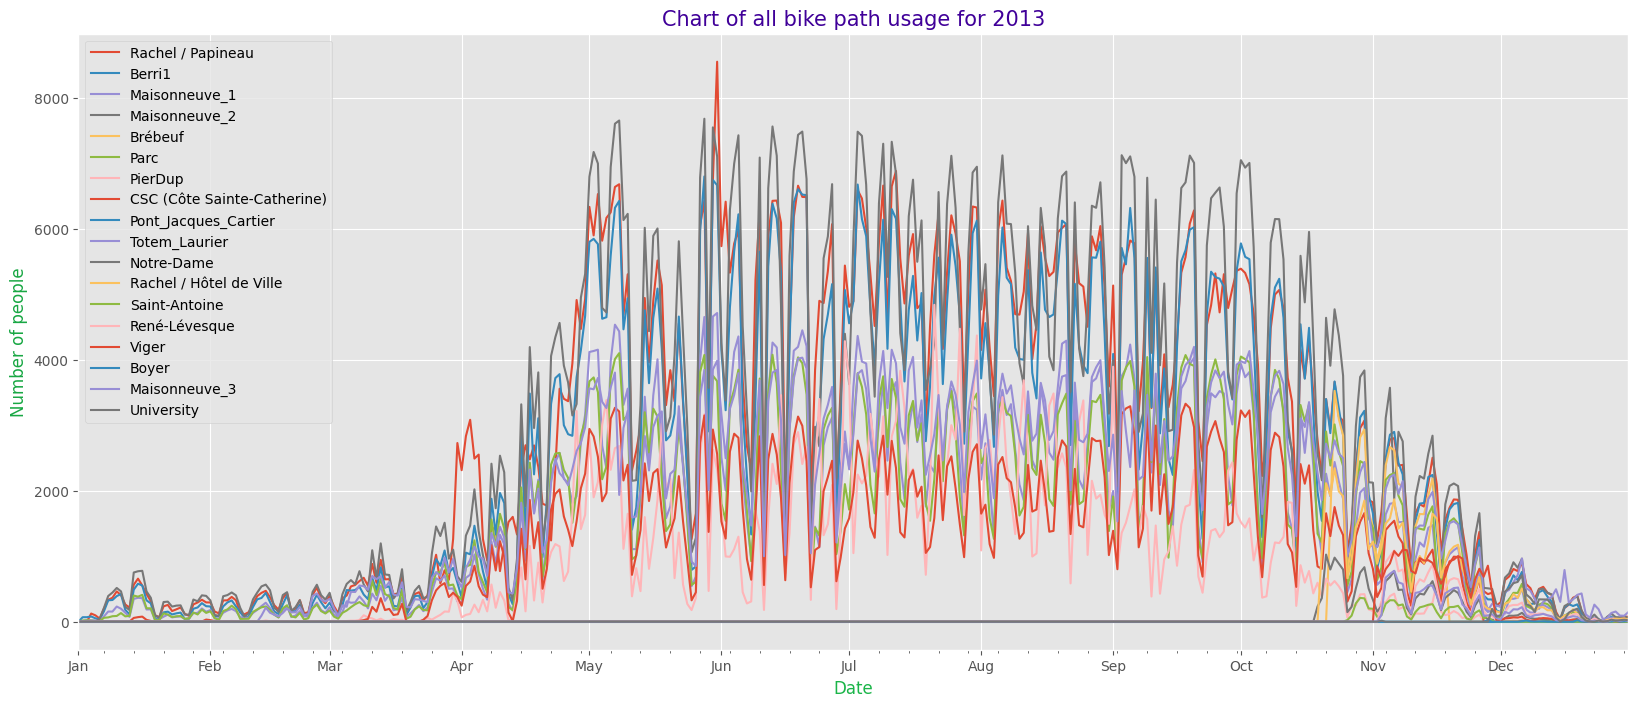

Total number of cyclists per year on all cycle paths: 5849322

Total number of cyclists per year on each cycle path: 
Rachel / Papineau              1030398
Berri1                          924996
Maisonneuve_1                   595639
Maisonneuve_2                  1097960
Brébeuf                          51689
Parc                            585863
PierDup                         348153
CSC (Côte Sainte-Catherine)     420280
Pont_Jacques_Cartier                 0
Totem_Laurier                   657872
Notre-Dame                       19044
Rachel / Hôtel de Ville          52039
Saint-Antoine                     6140
René-Lévesque                    16630
Viger                            23838
Boyer                              145
Maisonneuve_3                    12565
University                        6071
dtype: int64

The month most popular with cyclists on three bike paths: 
Parc - September
PierDup - July
CSC (Côte Sainte-Catherine) - September


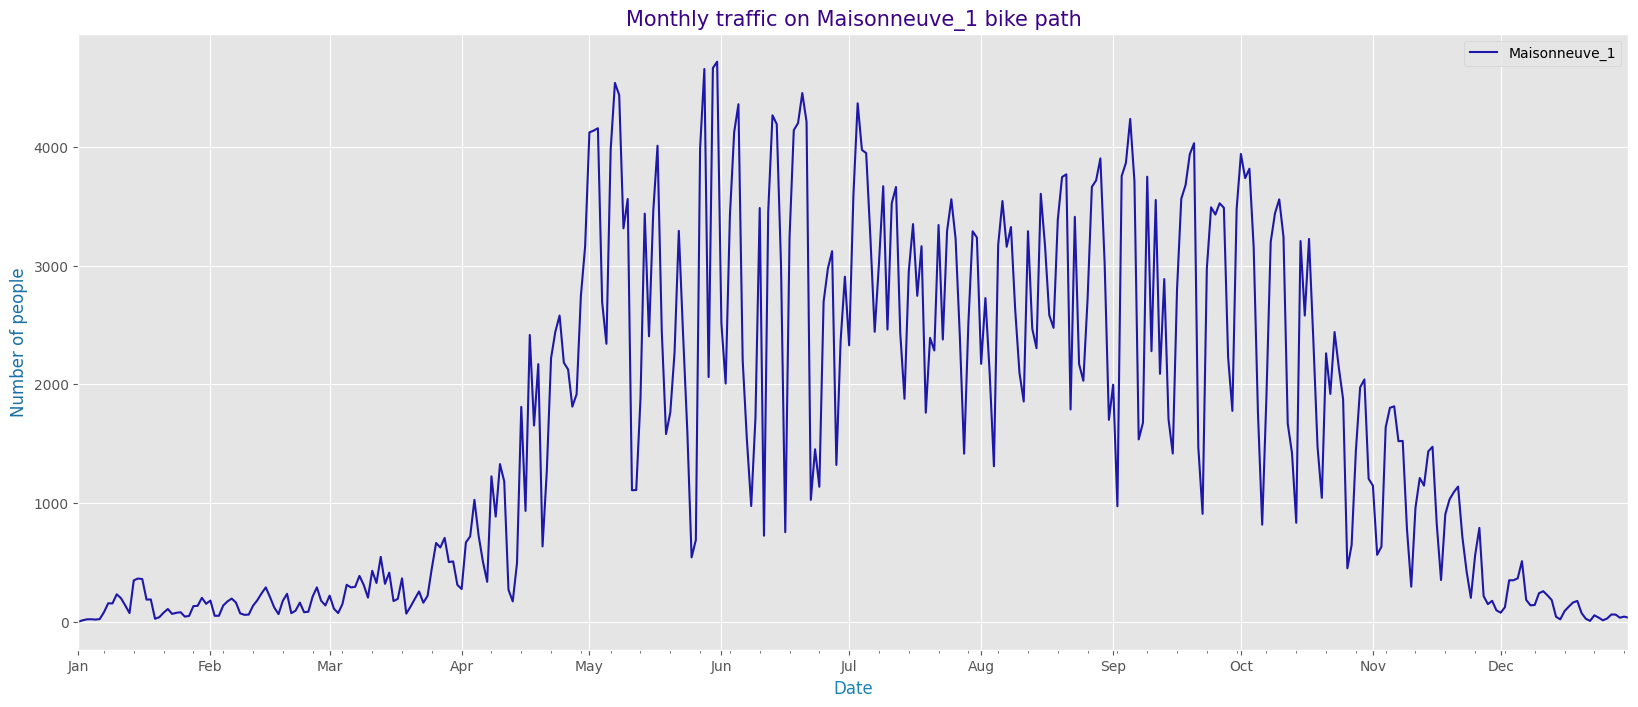

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from IPython.display import display

try:
    df = pd.read_csv("comptagevelo2013.csv", delimiter = ",", encoding = "utf-8", index_col = "Date", parse_dates = ["Date"])
    print(f"{"Bike path usage in 2013":^145}")
except FileNotFoundError:
    print("File \"comptagevelo2013.csv\" not found!")
except:
    print("Error with file \"comptagevelo2013.csv\"!")

# Коригування даних - заповнення пропущених значень нулями та конвертація у цілочислений формат 
df = df.fillna(0).astype(int)
display(df)

# Перевірка основних характеристик датафрейму
pd.set_option("display.width", 1000)
print(f"Main characteristics of DataFrame:\nFirst lines (df.head()):\n{"Bike path usage in 2013":^145}\n{df.head()}\n")
print(f"Technical information (df.info()):")
print(df.info())
print(f"\nStatistical analysis (df.describe()):\n{df.describe()}")

# Побудова графіка завантаженості усіх велодоріжок за рік
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (20, 8)
ax = df.plot()

plt.title("Chart of all bike path usage for 2013", fontsize = 15, color = "#400099")
plt.xlabel("Date", color = "#1BB549", fontsize = 12)
plt.ylabel("Number of people", color = "#18A743", fontsize = 12)

ax.xaxis.set_major_locator(dates.MonthLocator(interval = 1))
ax.xaxis.set_major_formatter(dates.DateFormatter("%b"))
plt.show()

# Визначення загальної кількості велосипедистів за рік на усіх/кожній велодоріжці, найбільш популярні місяці на трьох велодоріжок
print(f"Total number of cyclists per year on all cycle paths: {int(df.sum().sum())}")
print(f"\nTotal number of cyclists per year on each cycle path: \n{df.sum()}")

print(f"\nThe month most popular with cyclists on three bike paths: ")
for path in df.columns[5:8]:
    month = df[path].groupby(df.index.month).sum().idxmax()
    monthname = pd.to_datetime(f'2023-{month}-01').month_name()
    print(f"{path} - {monthname}")

# Побудова графіка завантаженості однієї велодоріжки по місяцям 
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (20, 8)
path = df.columns[2]

plt.title(f"Monthly traffic on {path} bike path", fontsize = 15, color = "#3A0287")
plt.xlabel("Date", color = "#1B84B5", fontsize = 12)
plt.ylabel("Number of people", color = "#1870A7", fontsize = 12)

ax = df[path].plot(color = "#1D18A7")
ax.xaxis.set_major_locator(dates.MonthLocator(interval = 1))
ax.xaxis.set_major_formatter(dates.DateFormatter("%b"))
plt.legend()